# CESATEM descriptive analysis

import all dependensis

In [1]:
import pandas as pd
import sklearn.cluster
import sklearn.decomposition

import os.path
import sys

%load_ext autoreload
%autoreload 1

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.tools
%aimport data.tools
%aimport data.cesatem
%aimport models
%aimport visualization.simple

In [3]:
import data.cesatem

import features.normalizer
import features.tools

import visualization.simple

read CESATEM data without micro-entreprise

In [4]:
data_frame, columns = data.cesatem.without_micro()
data_frame.head()

,CESATEM_BR,CESATEM_BS,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD,Date
0,1107,1055,2948,4473,529,1018,754,579,683,2842,1486,1142,01/2000
1,1124,1088,3051,4366,523,1062,833,598,671,3197,1566,1134,02/2000
2,1026,971,2887,4426,442,967,865,573,672,2844,1452,1038,03/2000
3,1114,1061,3117,4467,490,1084,919,597,700,3146,1699,1293,04/2000
4,1207,1131,3188,4555,506,1145,973,636,806,3041,1485,1311,05/2000


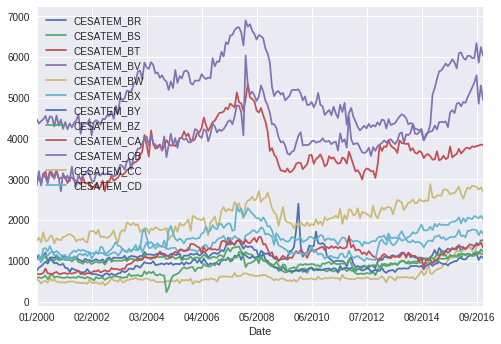

In [5]:
visualization.simple.temporal(data_frame)

sum all columns to get total compagny created

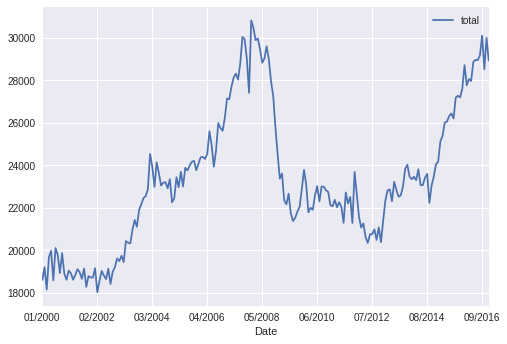

In [6]:
data_sum = data_frame.copy().drop("Date", axis=1).sum(axis=1)
data_sum = pd.concat([data_sum, data_frame[["Date"]]], axis=1)
data_sum.columns = ["total", "Date"]

visualization.simple.temporal(data_sum, ["total"])

extract 4 ranges and and compute sum of them

In [7]:
d1 = pd.DataFrame(data_frame.head(50).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[150:200].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[50:100].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[100:150].sum(axis=0)).transpose()
q_data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
q_data = q_data.drop("Date", axis=1)
q_data.head()

,CESATEM_BR,CESATEM_BS,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD
0,53342,50385,153883,231985,24709,58289,39486,29983,38571,159105,81697,62585
1,61141,56063,215597,293473,27704,70419,49192,41871,64980,211399,100232,86462
2,58291,39781,176670,251049,28318,77276,41397,45117,62858,203304,105242,65240
3,57094,48496,181860,246030,39499,87552,44176,50971,57519,212897,124055,73994


### Number of compagnies created for periods

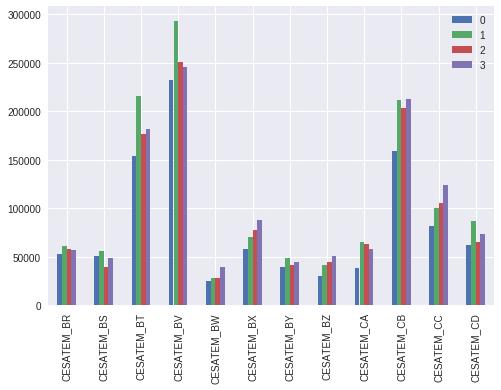

In [8]:
d = q_data.copy().transpose()

visualization.simple.bar(d)

###  By percentage of compagnies created

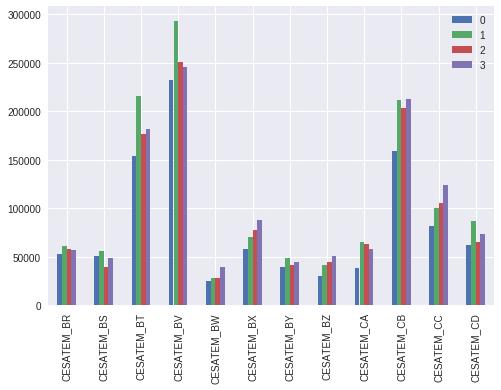

In [9]:
n_data = d / d.sum()

visualization.simple.bar(d)

# Correlation

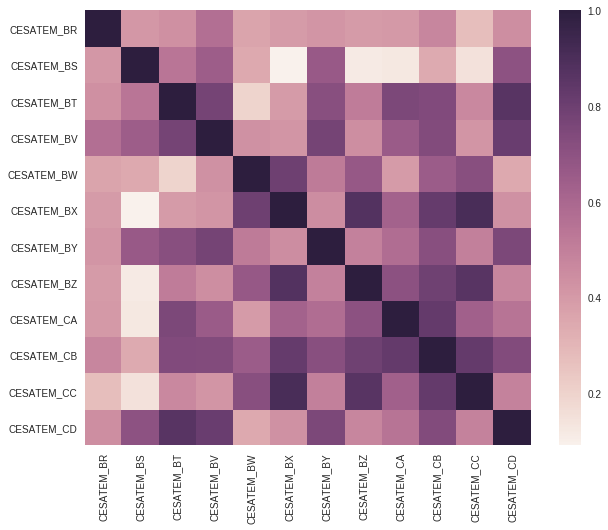

In [10]:
d_c = data_frame.copy().drop("Date", axis=1)
corr = d_c.corr()

visualization.simple.heat_map(corr, corr.columns.values, corr.columns.values, (10, 8))

normalize all columns

In [11]:
d_c = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(d_c)
norm_data = pd.concat([data_frame[["Date"]], norm_data], axis=1)

### First example : with BV and CC

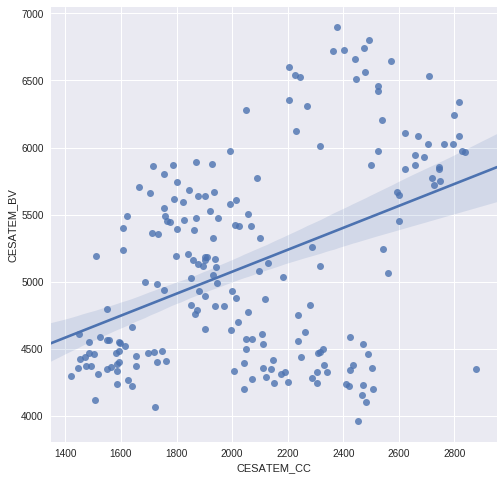

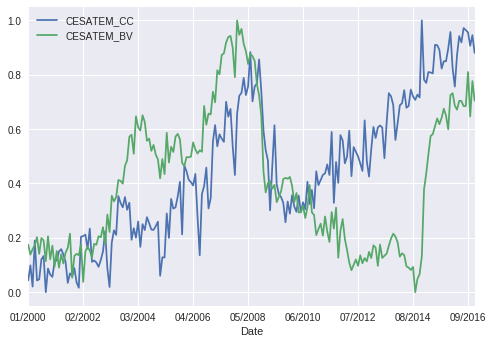

In [12]:
visualization.simple.linear_regression(d_c, "CESATEM_CC", "CESATEM_BV", (8, 8))
visualization.simple.temporal(norm_data, ["CESATEM_CC", "CESATEM_BV"])

BV and CC are not correlated, we need to keep both

### Second example : with BT and CD

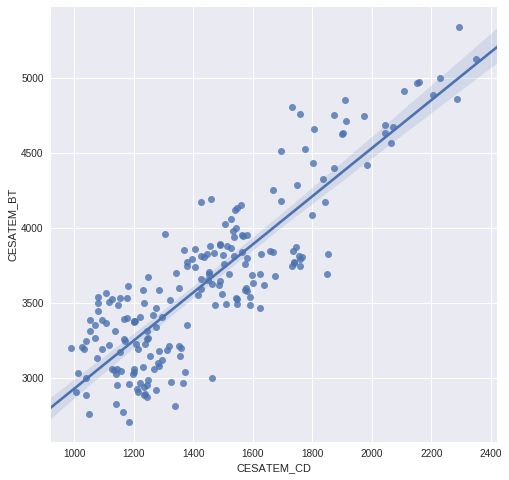

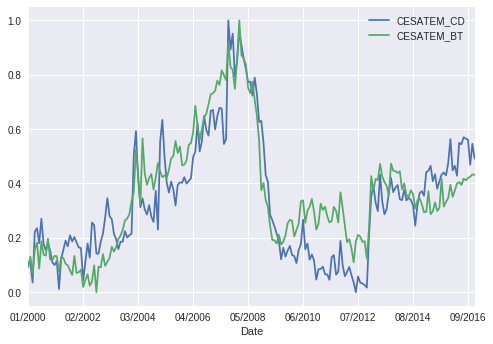

In [13]:
visualization.simple.linear_regression(d_c, "CESATEM_CD", "CESATEM_BT", (8, 8))
visualization.simple.temporal(norm_data, ["CESATEM_CD", "CESATEM_BT"])

CD and BT are highly correlated, we can delete one or merge them

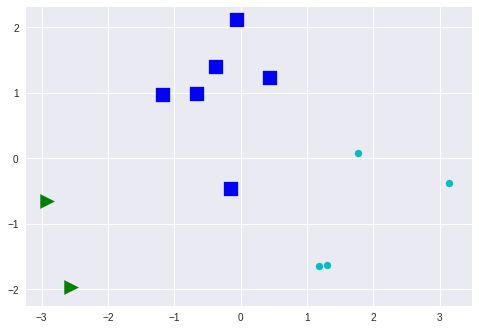

In [14]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

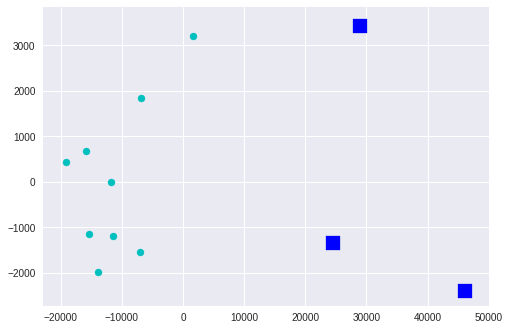

In [15]:
s_data = data_frame.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)